In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

In [3]:
# Define computational units: masses in solar masses, distances in AUs, time in Earth years
G=4.0*np.pi**2

In [4]:
# System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
N=2
mass=np.array([1.00,0.1])

# Choose orbital period of 1.0 Earth year
T=1.0
w=2.0*np.pi/T

# Kepler's 3rd Law to compute semi-major axis
M=np.sum(mass)
a=(G*M/w**2)**(1.0/3.0)

# Initial positions: place two masses on x-axis with center-of-mass at origin
# rows: different masses; columns: x, y, z coordinates
position=np.zeros([N,3])
position[0,:]=np.array([-a*mass[1]/M,0,0])
position[1,:]=np.array([+a*mass[0]/M,0,0])

# Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
# rows: different masses; columns: x, y, z components of velocity
velocity=np.zeros([N,3])
velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
velocity[1,:]=np.array([0,position[1,0],0])*w*1.25

In [5]:
# Step size and number of time steps
dt=T/720.0
tot_time=4.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position

In [6]:
# First time step
acceleration=G*accel_grav(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position

In [7]:
# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=G*accel_grav(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position

[[[-9.38436469e-02 -9.38400736e-02 -9.38293544e-02 ...  1.15481529e-01
    1.16030105e-01  1.16577913e-01]
  [ 0.00000000e+00 -1.02367539e-03 -2.04727282e-03 ... -1.77304967e-01
   -1.77315356e-01 -1.77324572e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 9.38436469e-01  9.38400736e-01  9.38293544e-01 ... -1.15481529e+00
   -1.16030105e+00 -1.16577913e+00]
  [ 0.00000000e+00  1.02367539e-02  2.04727282e-02 ...  1.77304967e+00
    1.77315356e+00  1.77324572e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]]


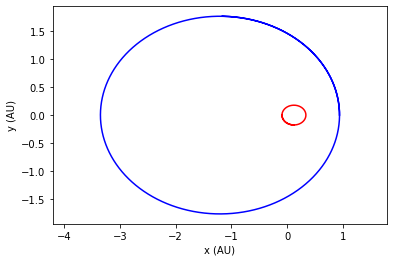

In [8]:
plt.plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
plt.axis('equal');
plt.xlabel('x (AU)');
plt.ylabel('y (AU)');

